<a href="https://colab.research.google.com/github/paulsouthard1/GLesson/blob/master/Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x = np.linspace(0,200,21)

In [0]:
zi = np.zeros_like(x)
for i in np.arange(1,len(zi)):
    if i <= (len(zi)/2.):
        zi[i] = zi[i-1] + 5
    else:
        zi[i] = zi[i-1] - 5

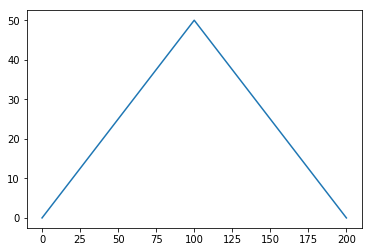

In [17]:
plt.plot(x,zi)

In [0]:
def evolve(x,zi,k,t,dt,u,bd):
    # Calculate dx
    dx = x[1]-x[0]
    # Create array so store elevation at each timestep
    z_out = np.zeros((int((t/dt)+1),len(x)))
    # Store initial Elevation as timestep 0 in array
    z_out[0] = zi
    # Create array of times at different timesteps
    ts = np.linspace(dt,t,t/dt)
    ts = np.concatenate(([0],ts))
    # Set Elevation at boundaries
    z_out[0,0] = zi[0]
    z_out[0,-1] = zi[0]
    # Print specifics of model
    print('Running a Model with k = '+str(k)+', time = '+str(t)+', and uplift ='+str(u))
    #Create loop to iterate through timesteps for diffusion
    for i in np.arange(1,len(ts)):
        for l in np.arange(1,len(x)-1):
            q_l = k*((z_out[i-1][l-1]-z_out[i-1][l])/dx)
            q_r = k*((z_out[i-1][l+1]-z_out[i-1][l])/dx)
            z_out[i][l] = z_out[i-1][l] + q_r*dt + q_l*dt + u*dt
        for l in [0,len(x)-1]:
            z_out[i][l] = z_out[i-1][l] - bd*dt + u*dt
    return z_out

In [65]:
z_out = evolve(x,zi,0.1,100000,50,0.0001,0.00015)

Running a Model with k = 0.1, time = 100000, and uplift =0.0001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


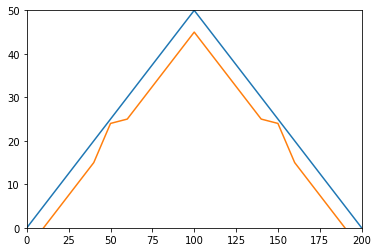

In [218]:
import matplotlib.animation as animation
from IPython.display import HTML

# initialization function: plot the background of each frame
def init():
    line.set_ydata(z_out[0])
    line2.set_ydata(w_out[0])
    return (line,line2,)
  
# animation function. This is called sequentially
def animate(i):
    line.set_ydata(z_out[200*i])
    line2.set_ydata(w_out[200*i])
    return (line,line2,)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, np.max(x)))
ax.set_ylim((0,np.max(zi)))

line, = ax.plot(x, z_out[0])
line2, = ax.plot(x, w_out[0])
  
anim = animation.FuncAnimation(fig, animate, frames = 100,init_func=init,blit=True)

In [219]:
HTML(anim.to_html5_video())

In [0]:
def evolve(x,zi,wi,k,aw,bw,t,dt,u,bd):
    # Calculate dx
    dx = x[1]-x[0]
    # Create array so store elevation at each timestep
    z_out = np.zeros((int((t/dt)+1),len(x)))
    # Create array to store bedrockelevation at each timestep
    w_out = np.zeros((int((t/dt)+1),len(x)))
    # Store initial Elevation as timestep 0 in array
    z_out[0,:] = zi
    # Store initial bedrock Elevation as timestep 0 in array
    w_out[0,:] = wi
    # Create array of times at different timesteps
    ts = np.linspace(dt,t,t/dt)
    ts = np.concatenate(([0],ts))
    # Set Elevation at boundaries
    z_out[0,0] = zi[0]
    z_out[0,-1] = zi[-1]
    # Set Bedrock Elevation at boundaries
    w_out[0,0] = wi[0]
    w_out[0,-1] = wi[-1]
    # Create thickness array
    th = np.zeros_like(x)
    # Print specifics of model
    print('Running a Model with k = '+str(k)+', time = '+str(t)+', and uplift ='+str(u))
    #Create loop to iterate through timesteps for diffusion
    for i in np.arange(1,len(ts)):
        # Create loop to iterate through model grid
        for l in np.arange(0,len(x)):
            th[l] = z_out[i-1][l] - w_out[i-1][l]
            w_r = aw*np.exp(-bw*th[l])
            w_out[i][l] = w_out[i-1][l] - w_r*dt + u*dt   
        for l in np.arange(1,len(x)-1):
            q_l = k*((z_out[i-1][l-1]-z_out[i-1][l])/dx)
            q_r = k*((z_out[i-1][l+1]-z_out[i-1][l])/dx)
            z_out[i][l] = z_out[i-1][l] + q_r*dt + q_l*dt + u*dt
            if z_out[i][l] < w_out[i][l]:
              z_out[i][l] = w_out[i][l]
        for l in [0,len(x)-1]:
            z_out[i][l] = z_out[i-1][l] + bd*dt + u*dt
            w_out[i][l] = w_out[i-1][l] + bd*dt + u*dt
    return z_out,w_out

In [221]:
z_out,w_out = evolve(x,zi,wi,0.05,0.5,5,20000,1,0.0001,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


Running a Model with k = 0.05, time = 20000, and uplift =0.0001


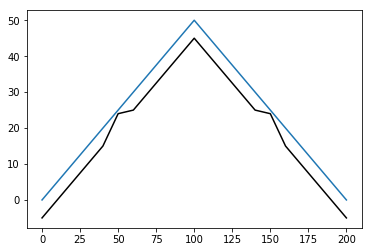

In [211]:
step = 0
plt.plot(x,z_out[step,:])
plt.plot(x,w_out[step,:],'k')

In [147]:
x

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [148]:
wi

array([  0. ,   4.5,   9. ,  13.5,  18. ,  22.5,  27. ,  31.5,  36. ,
        40.5,  45. ,  39.5,  34. ,  28.5,  23. ,  17.5,  12. ,   6.5,
         1. ,  -4.5, -10. ])

In [149]:
zi

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 45., 40.,
       35., 30., 25., 20., 15., 10.,  5.,  0.])

In [150]:
zi-wi

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])